In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from string import ascii_letters

In [397]:
df = pd.read_csv("data.csv")
df.drop(columns='Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Разделим данные на количественные и категориальные. Это понадобится нам для дальнейшей раздельной предобработки.

In [398]:
dtype = pd.DataFrame({"columns":df.dtypes.index, "dtype":df.dtypes})
dtype["dtype"] = [str(i) for i in dtype["dtype"]]
dtype

,columns,dtype
MSSubClass,MSSubClass,int64
MSZoning,MSZoning,object
LotFrontage,LotFrontage,float64
LotArea,LotArea,int64
Street,Street,object
...,...,...
MoSold,MoSold,int64
YrSold,YrSold,int64
SaleType,SaleType,object
SaleCondition,SaleCondition,object


In [399]:
num_columns = dtype.query('dtype=="int64" | dtype=="float64"')["columns"].values[1:-1]
obj_columns = dtype.query('dtype=="object"')["columns"].values

print("numerical_values_count:{}".format(len(num_columns)))
print("object_values_count:{}".format(len(obj_columns)))

numerical_values_count:35
object_values_count:43


# EDA & Data preprocessing

Проведите упращенный анализ данных.

In [400]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Null data

Проведите анализ данных по нулевым значениям. Решите, что вы будете делать с этими данными (удалить, заполнить нулями или средним или как-то иначе)

In [401]:
columns_with_null = df[obj_columns].isna().any()
columns_with_null = columns_with_null[columns_with_null==True]
pr_null = []
for col in columns_with_null.index:
    pr_null.append(round(df[df[col].isnull()].shape[0]/df[col].shape[0]*100,2))

df_null_val = pd.DataFrame({'Columns_with_null':columns_with_null.index, 'Percent_null_val':pr_null })
df_null_val

,Columns_with_null,Percent_null_val
0,Alley,93.77
1,MasVnrType,0.55
2,BsmtQual,2.53
3,BsmtCond,2.53
4,BsmtExposure,2.60
5,BsmtFinType1,2.53
6,BsmtFinType2,2.60
7,Electrical,0.07
8,FireplaceQu,47.26
9,GarageType,5.55


In [402]:
df = df.drop(columns=['MiscFeature'])

In [403]:
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu' , 'GarageType', 'GarageFinish' , 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu']:
    df[col].fillna('NA', inplace=True)

In [404]:
df.MasVnrType.fillna(df.MasVnrType.mode(), inplace=True)
df.Electrical.fillna(df.Electrical.mode(), inplace=True)

In [405]:
dtype = pd.DataFrame({"columns":df.dtypes.index,
                      "dtype":df.dtypes})
dtype["dtype"] = [str(i) for i in dtype["dtype"]]

num_columns = dtype.query('dtype=="int64" | dtype=="float64"')["columns"].values[1:-1]
obj_columns = dtype.query('dtype=="object"')["columns"].values

print("numerical_values_count:{}".format(len(num_columns)))
print("object_values_count:{}".format(len(obj_columns)))

numerical_values_count:35
object_values_count:42


In [406]:
def example_plot(ax, val, lable, type_plot='bar'):

    if type_plot=='bar':
        val = round(val.value_counts()/val.shape[0]*100)
        ax.bar(val.index, val.values, label=lable)

    elif type_plot=='hist':
        ax.hist(val, 50, density=True, facecolor='g', alpha=0.75)
        ax.set_ylabel('pr', fontsize=9)
    ax.set_title(lable, fontsize=14)

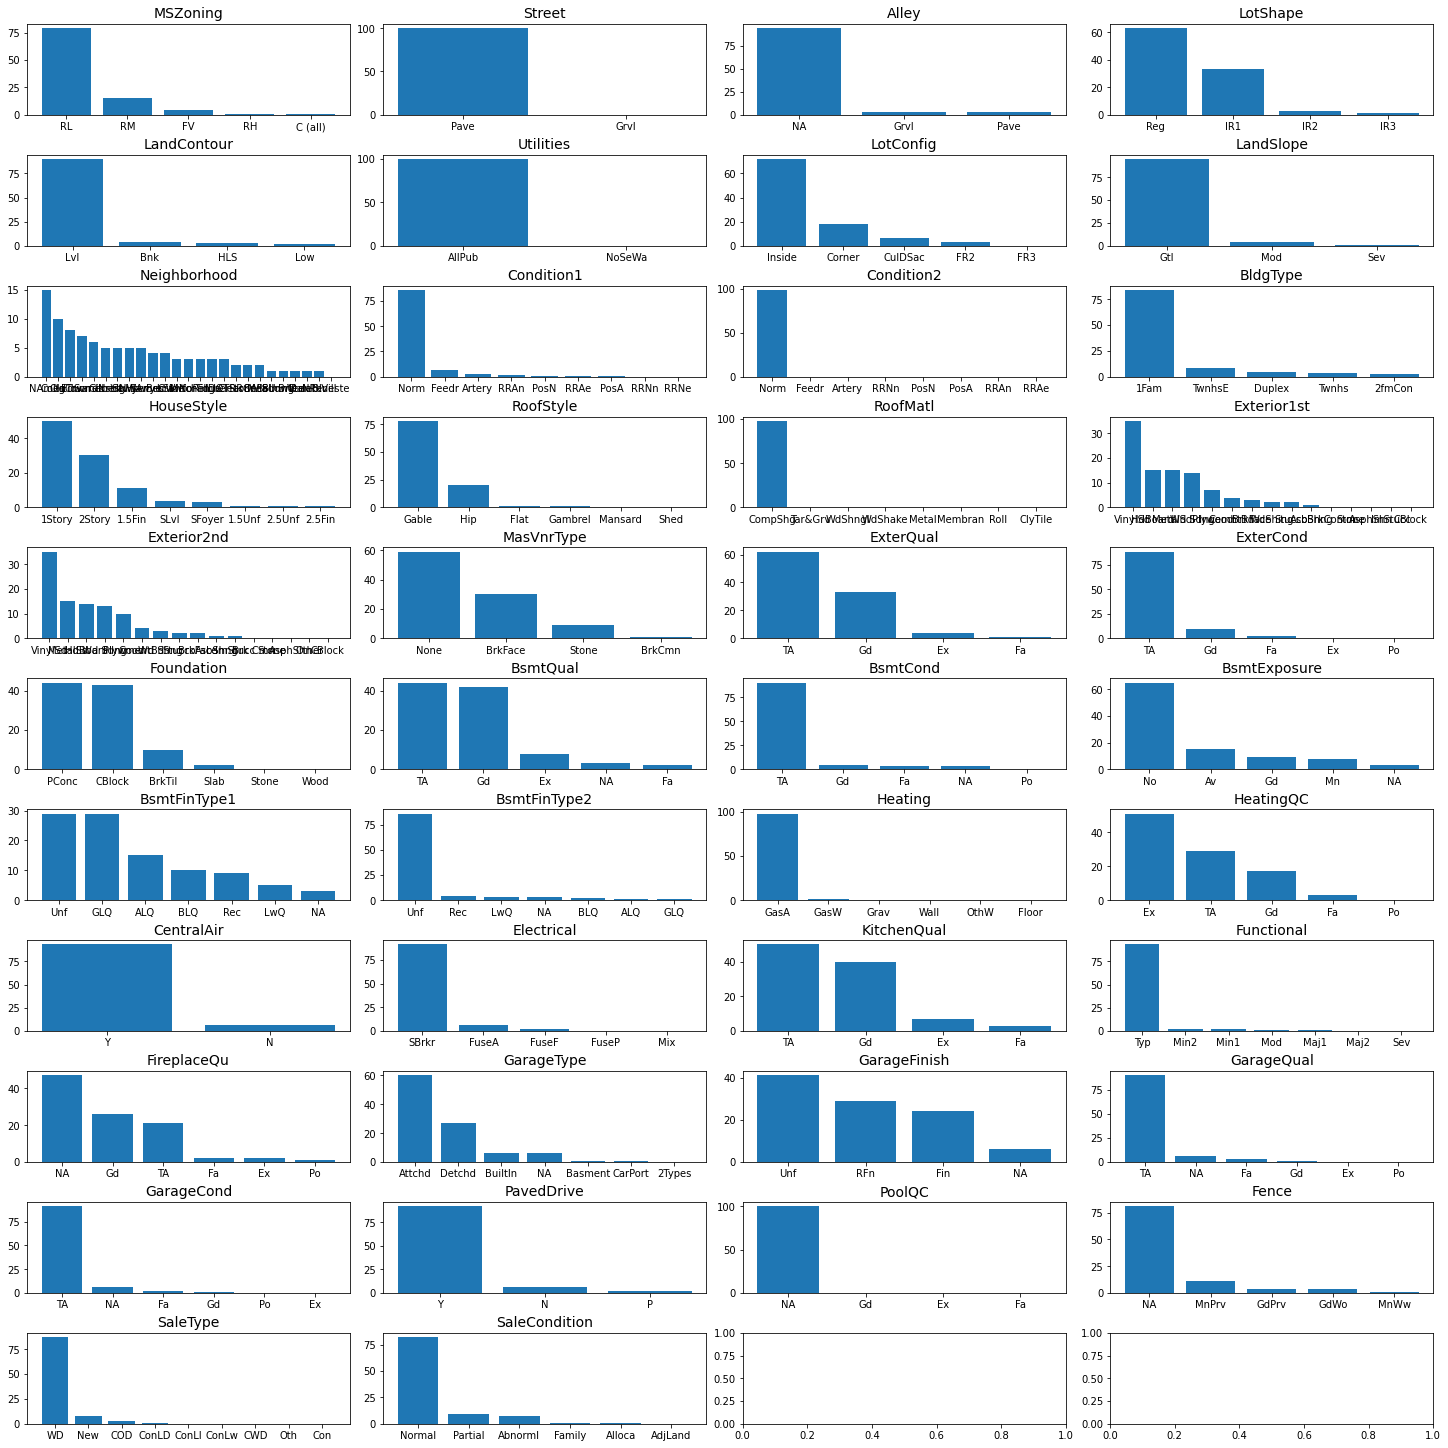

In [407]:
fig, axs = plt.subplots(nrows=11, ncols=4, constrained_layout=True, figsize=(20, 20))

for i in range(obj_columns.shape[0]):
    example_plot(axs.flat[i], df[obj_columns[i]], obj_columns[i])

In [408]:
columns_with_null = df[num_columns].isna().any()
columns_with_null = columns_with_null[columns_with_null==True]
pr_null = []
for col in columns_with_null.index:
    pr_null.append(round(df[df[col].isnull()].shape[0]/df[col].shape[0]*100,2))

df_null_val = pd.DataFrame({'Columns_with_null':columns_with_null.index, 'Percent_null_val':pr_null })
df_null_val

,Columns_with_null,Percent_null_val
0,LotFrontage,17.74
1,MasVnrArea,0.55
2,GarageYrBlt,5.55


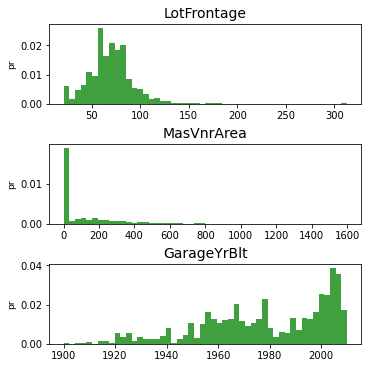

In [409]:
fig, axs = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(5, 5))
for i in range(df_null_val.shape[0]):
    example_plot(axs.flat[i], df[df_null_val.Columns_with_null.iloc[i]], df_null_val.Columns_with_null.iloc[i], 'hist')

In [410]:
for col in ['LotFrontage', 'MasVnrArea']:
    df[col].fillna(df[col].median(), inplace=True)

In [411]:
df['GarageYrBlt'] = df[['YearBuilt', 'GarageYrBlt']].apply(lambda x: x[0] if str(x[1])=='nan' else x[1] ,axis=1)

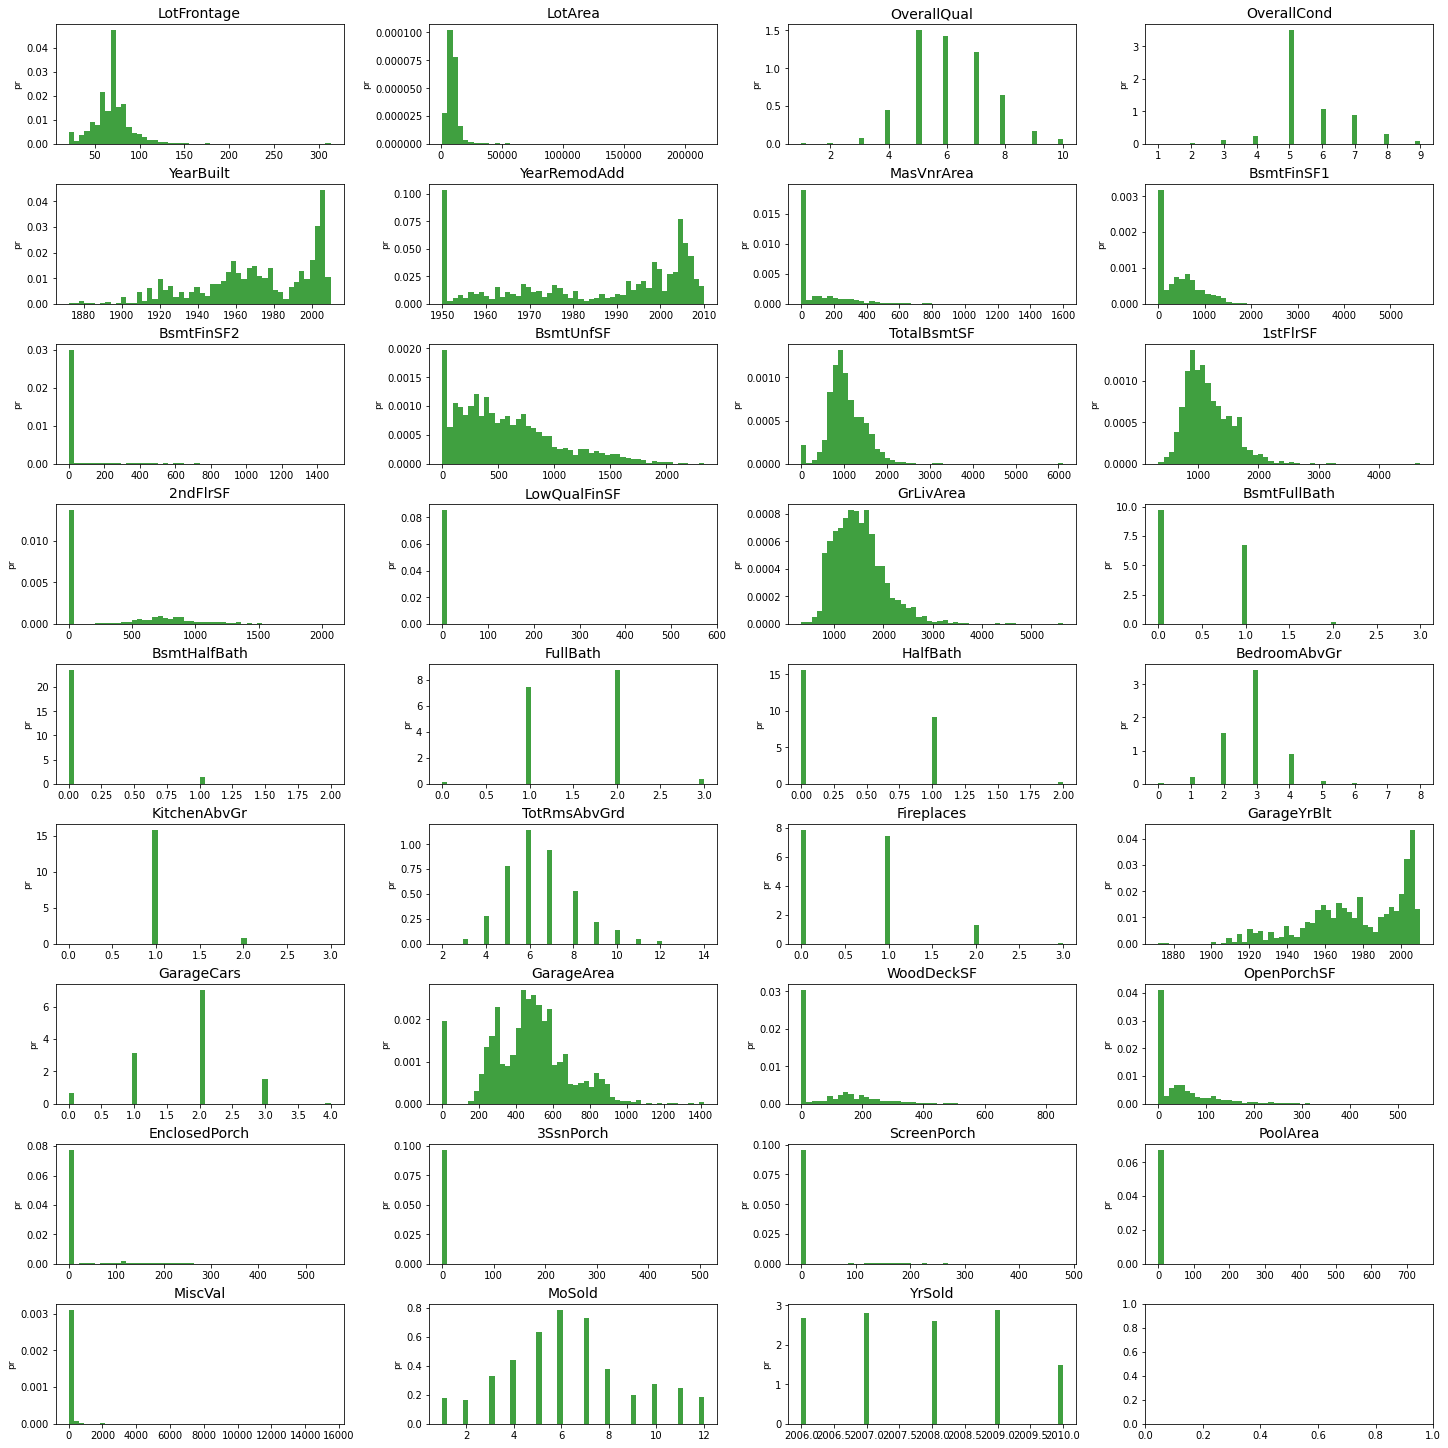

In [412]:
fig, axs = plt.subplots(nrows=9, ncols=4, constrained_layout=True, figsize=(20, 20))
for i in range(num_columns.shape[0]):
    example_plot(axs.flat[i], df[num_columns[i]], num_columns[i], 'hist')

In [413]:
emissions_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
for i in emissions_col:
    df = df[df[i]<=df[i].quantile(0.98)]
df.shape

(1152, 79)

### Target value

Постройте распределение целевой переменной. Распределение близко к нормальному? Если нет, то можно ли как-то это исправить?

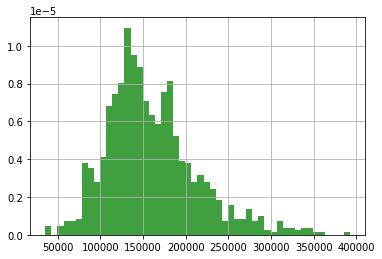

In [414]:
x = df.SalePrice
mu, sigma = 100, 15
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

Вывод: распределение недостаточно близко к нормальному, нужно обработать

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d07f5b070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d07b82df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d07f5bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d07b82af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d07b82280>],
 'means': []}

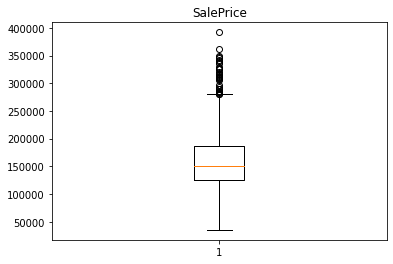

In [415]:
fig1, ax1 = plt.subplots()
ax1.set_title('SalePrice')
ax1.boxplot(df.SalePrice)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d04464af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d048e9ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d04464bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d048e95e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d049b0790>],
 'means': []}

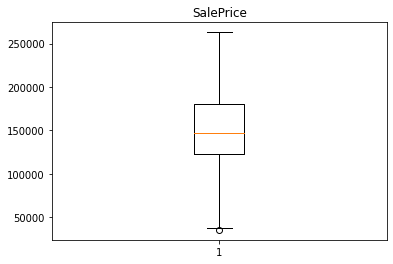

In [416]:
fig1, ax1 = plt.subplots()
ax1.set_title('SalePrice')
ax1.boxplot(df[(df.SalePrice<=df.SalePrice.quantile(0.95))].SalePrice)

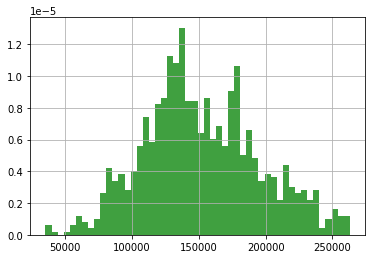

In [417]:
x = df[(df.SalePrice<=df.SalePrice.quantile(0.95))].SalePrice
mu, sigma = 100, 15
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

In [418]:
df = df[(df.SalePrice<=df.SalePrice.quantile(0.95))]
df.shape

(1094, 79)

### Categorical value preprocessing

In [419]:
df_ohe = pd.get_dummies(df[obj_columns])
for col in df_ohe.columns:
    df[col] = df_ohe[col]
df.shape

/tmp/ipykernel_27452/4092796699.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



(1094, 325)

### Correlations

Целью корреляционного анализа является отбор признаков для дальнейшего построения модели регрессии. Постройте корреляционную матрицу.

In [420]:
corr = df.corr()
big_corr = []
for col in corr.columns:
    for i in corr.index:
        if i != col:
            if corr[col][i]*corr[col][i] == 1:
                big_corr.append((col, i))

In [421]:
del_columns = np.array(['Street_Pave',  'Utilities_NoSeWa',  'Exterior2nd_CBlock', 'BsmtCond_NA', 'BsmtFinType1_NA','CentralAir_N', 'GarageFinish_NA', 'GarageQual_NA','GarageCond_NA','GarageQual_Ex', 'GarageCond_Ex'])
ohe_columns = df_ohe.columns.difference(del_columns)

In [422]:
corr = df[np.append(ohe_columns, 'SalePrice')].corr()
categor_big_corr_target = []
col = 'SalePrice'
for i in corr[col].index:
    if i != col:
        if abs(corr[col][i]) >= 0.1:
            categor_big_corr_target.append(i)

len(categor_big_corr_target)

105

In [423]:
ohe_columns = df[categor_big_corr_target].columns.difference(del_columns)
ohe_columns.shape

(105,)

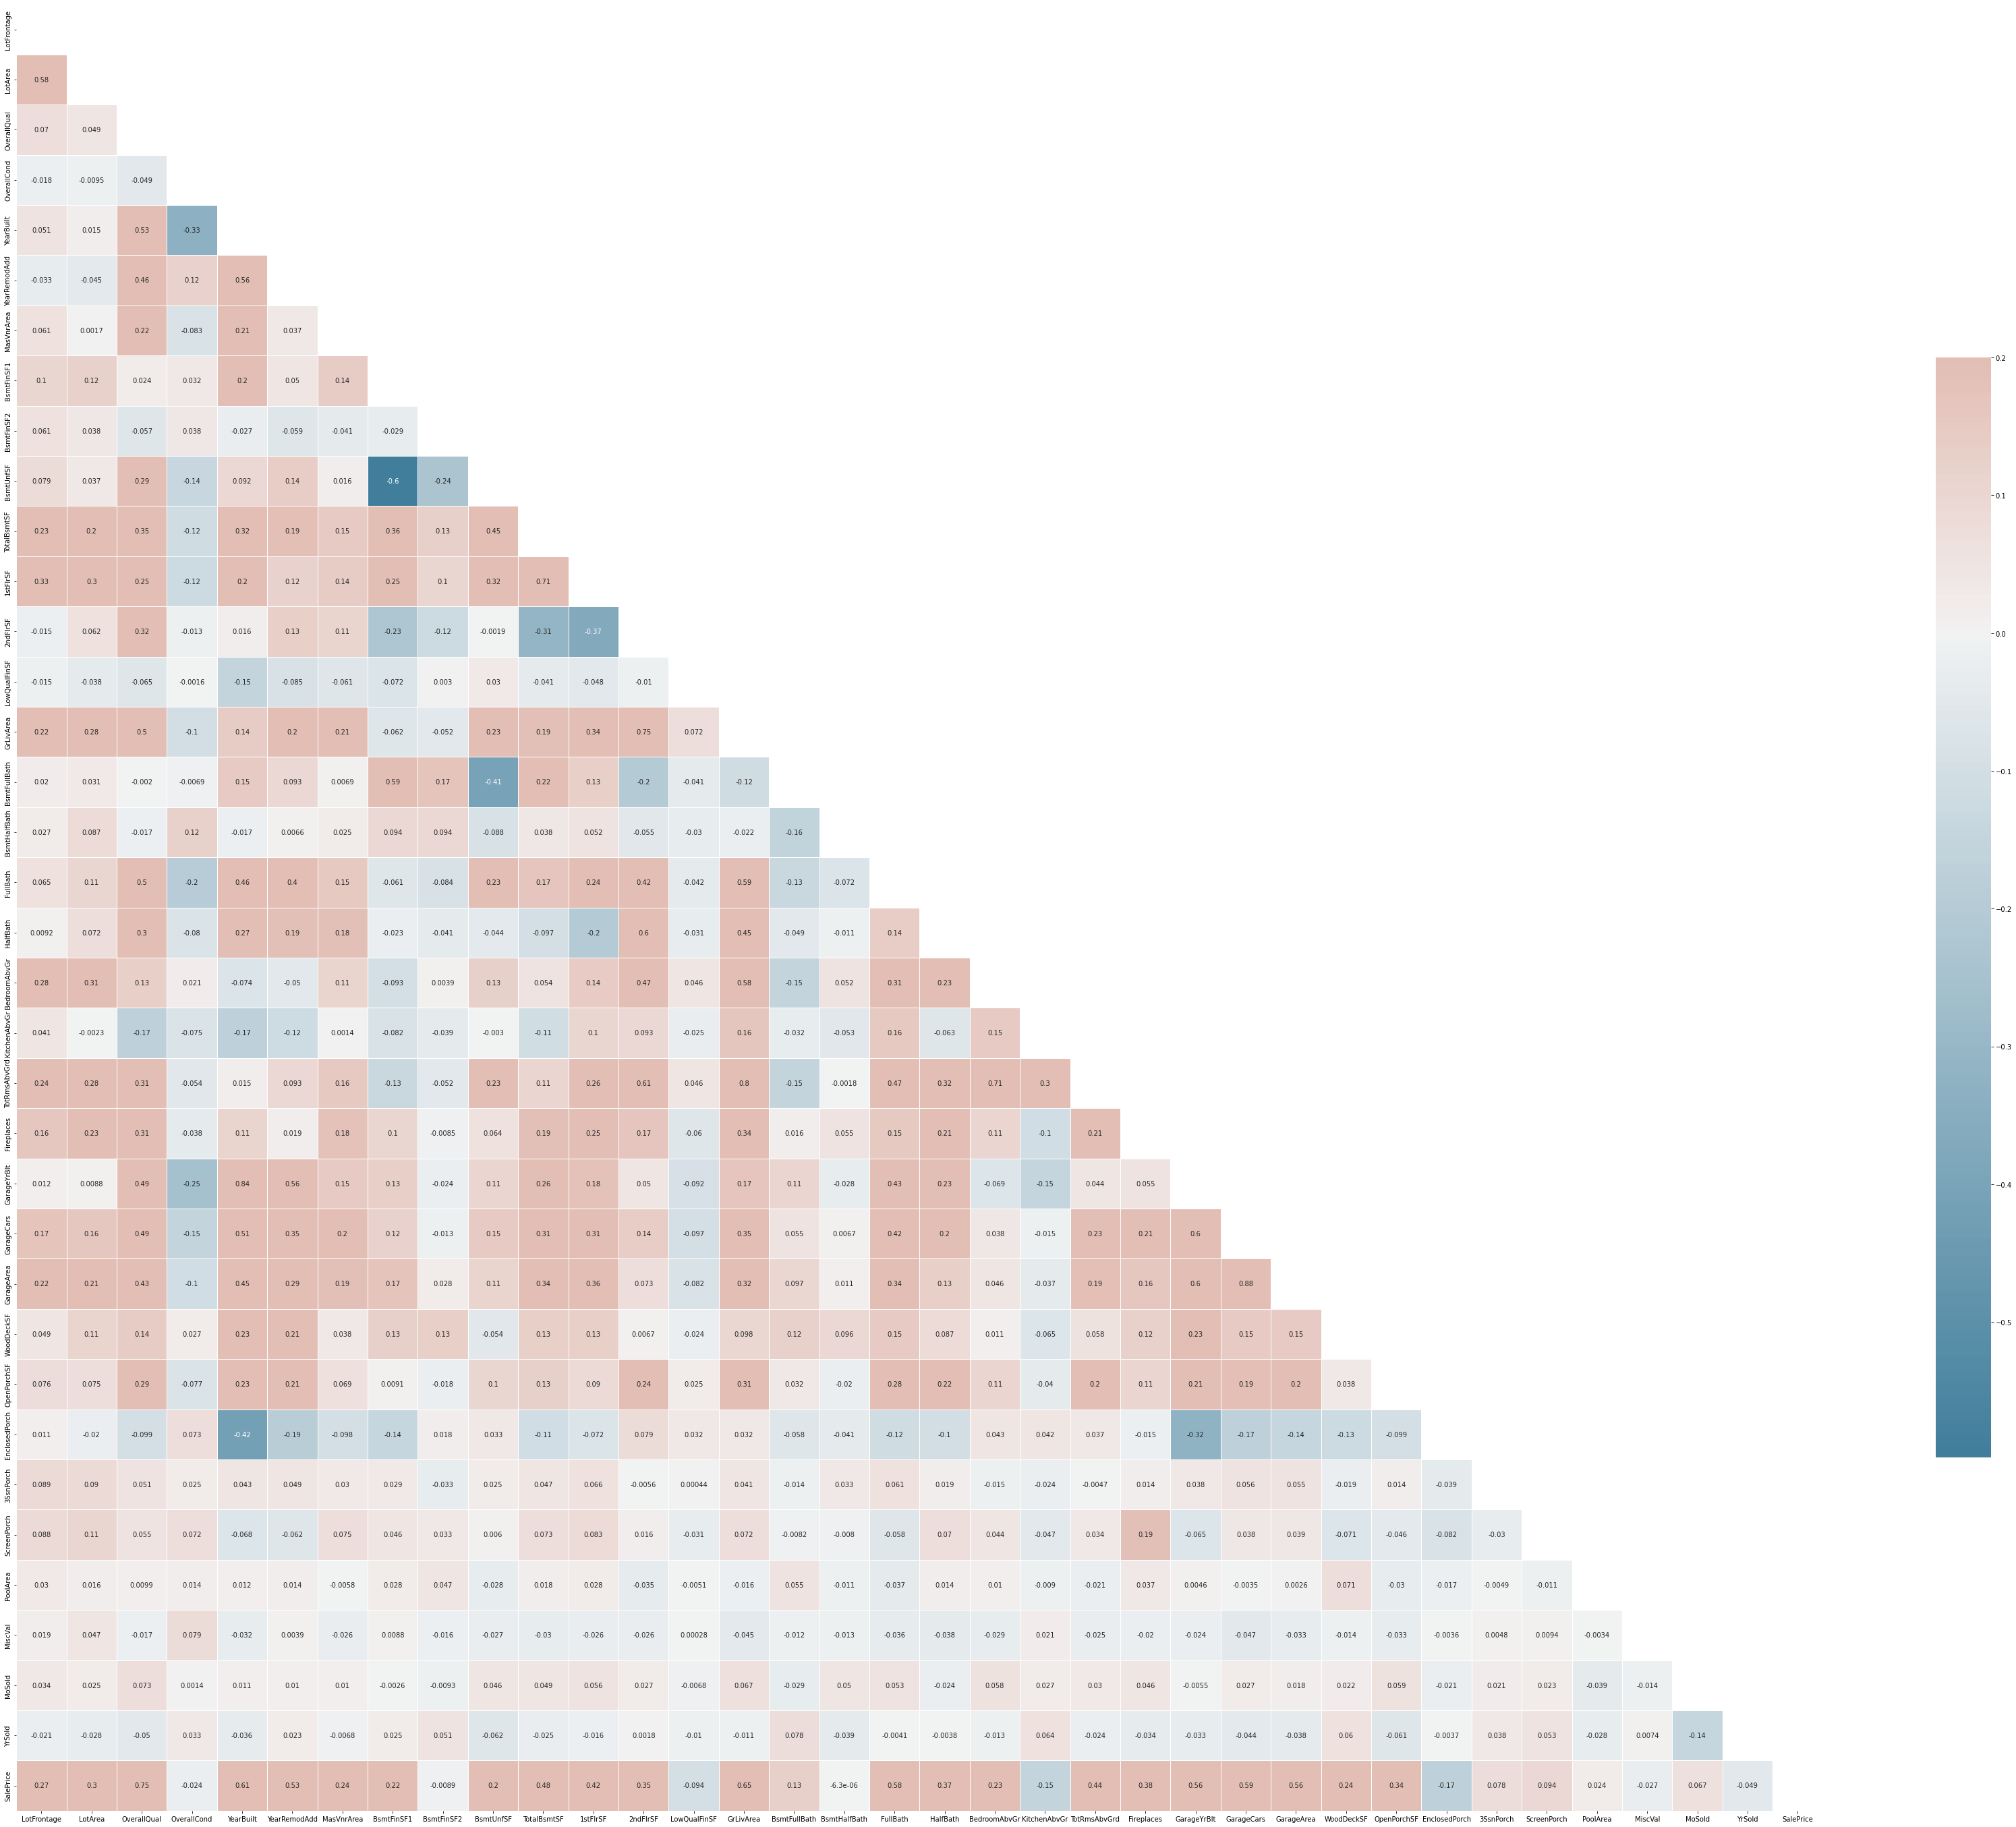

In [424]:
corr = df[np.append(num_columns, 'SalePrice')].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(60, 60))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig = ax.get_figure()

In [425]:
corr['SalePrice'].sort_values()[:5]

EnclosedPorch   -0.171378
KitchenAbvGr    -0.151710
LowQualFinSF    -0.093595
YrSold          -0.048722
MiscVal         -0.027409
Name: SalePrice, dtype: float64

In [426]:
corr['SalePrice'].sort_values(ascending=False)[:25]

SalePrice       1.000000
OverallQual     0.747334
GrLivArea       0.646107
YearBuilt       0.605314
GarageCars      0.591865
FullBath        0.576598
GarageArea      0.564464
GarageYrBlt     0.562838
YearRemodAdd    0.525806
TotalBsmtSF     0.475489
TotRmsAbvGrd    0.437253
1stFlrSF        0.423471
Fireplaces      0.381878
HalfBath        0.368811
2ndFlrSF        0.352106
OpenPorchSF     0.343012
LotArea         0.301393
LotFrontage     0.267624
MasVnrArea      0.244398
WoodDeckSF      0.241555
BedroomAbvGr    0.231028
BsmtFinSF1      0.216834
BsmtUnfSF       0.198505
BsmtFullBath    0.127307
ScreenPorch     0.093926
Name: SalePrice, dtype: float64

### Numerical value preprocessing

Для улучшения сходимости алгоритма и качества модели в целом, нормализуйте числовые данные. Вы можете использовать StandartScaler или MinMaxScaler

In [427]:
scaler = StandardScaler()
scaler.fit(df[num_columns])
df_norm = pd.DataFrame(scaler.transform(df[num_columns]), columns=num_columns)
norm_columns = df_norm.columns
df_norm.shape

(1094, 35)

In [428]:
for col in df_norm:
    df[col] = df_norm[col].values
df.shape

(1094, 325)

Feature engineering

Для улучшения качества модели следует составить новые признаки путем нелинейной обработки имеющихся. Уделите этому пункту особое внимание.

In [429]:
corr_group = df[np.append(ohe_columns, norm_columns)].corr()
corr = df[np.append(ohe_columns, norm_columns)].corr()

corr_val = 0.5
for col in corr_group.columns:
    corr_group[col] = corr_group[col].apply(lambda x: 1 if abs(x)>=corr_val else 0)

group = []
for col in corr_group.columns:
    if corr_group.groupby(col).count().iloc[1][0]-1 >=2:
        group.append(corr[abs(corr[col])>=corr_val].index)

In [430]:
#### поиск максимально похожих групп
min_cross = 1

new_group = []
for group_ind_1 in group:
    for group_ind_2 in group:
        cross_group = list(set(group_ind_1) & set(group_ind_2))
        if len(group_ind_1)-len(cross_group)<=min_cross:
            count = 0
            for i in new_group:
                if i == cross_group:
                    count+=1
            if count==0:
                new_group.append(cross_group)
len(new_group)

59

In [431]:
uni_col = []
f_e_columns = []
for i in new_group:
    for j in i:
        if not j in uni_col:
            uni_col.append(j)
len(uni_col)

for i in [ohe_columns, norm_columns]:
    for col in list(set(ohe_columns) - set(uni_col)):
        f_e_columns.append(col)

f_e_columns = list(set(f_e_columns))
len(f_e_columns)

67

In [432]:
for group_ind in new_group:
    f_e_columns.append(str(group_ind))
    df[str(group_ind)] = df[group_ind].apply(lambda row: np.mean(row), axis=1)
len(f_e_columns)

126

Вывод: агрегирование неэффективно

### Split train/test

Разделите данные на train и test используя метод train_test_split из библиотеки sklearn. Параметры test_size = 0.2, random_state = 10, для того у всех было одинаковое разделение.

In [433]:
X = pd.DataFrame()
for col in norm_columns:
    X[col] = df[col].values
for col in ohe_columns:
    X[col] = df[col].values
y = df.SalePrice

/tmp/ipykernel_27452/3760314006.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape

(875, 140)

# Linear regression

После того как вы подготовили данные, можно начинать обучение модели. Для линейной регрессии используется класс LinearRegression.

In [435]:
line_reg = LinearRegression().fit(X_train, y_train)
pred = line_reg.predict(X_test)

Посчитайте среднее абсолютное отклонение на обучающей и тестовой выборке. Смотрите sklearn mean_absolute_error.

In [436]:
print(f"Срееднее абсолютное отклонение - Train: {round(mean_absolute_error(y_train,  line_reg.predict(X_train)),2)}")
print(f"Срееднее абсолютное отклонение - Test: {round(mean_absolute_error(y_test, pred),2)}")

Срееднее абсолютное отклонение - Train: 9148.83
Срееднее абсолютное отклонение - Test: 10949.51


In [437]:
print(f"Срееднее абсолютное отклонение - Train: {round(mean_absolute_error(y_train,  line_reg.predict(X_train)),2)}")
print(f"Срееднее абсолютное отклонение - Test: {round(mean_absolute_error(y_test, pred),2)}")

Срееднее абсолютное отклонение - Train: 9148.83
Срееднее абсолютное отклонение - Test: 10949.51


Также для анализа модели можно построить график остатков.

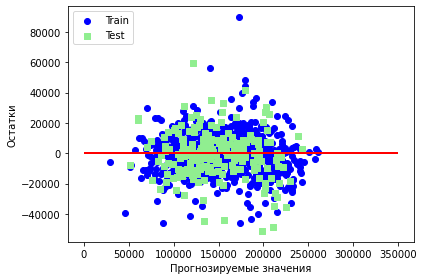

In [438]:
y_train_pred = line_reg.predict(X_train)
y_test_pred = line_reg.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Train')

plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test')

plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')

plt.legend(loc='upper left')

plt.hlines(y=0, xmin=-10, xmax=350000, lw=2, color='red')
plt.xlim()
plt.tight_layout()

### Regularization

Для повышения качества вы можете попробовать добавить регуляризацию в модель регрессии. Для этого используйте sklearn.linear_model Ridge, ElasticNet, Lasso.

In [439]:
sc_y = StandardScaler()
sc_y.fit(y.values.reshape(-1, 1))
y_train_scaled = sc_y.transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [440]:
line_reg = LinearRegression().fit(X_train, y_train_scaled)
pred = line_reg.predict(X_test)

print(f"Срееднее абсолютное отклонение - Train: {round(mean_absolute_error(y_train_scaled,  line_reg.predict(X_train)),2)}")
print(f"Срееднее абсолютное отклонение - Test: {round(mean_absolute_error(y_test_scaled, pred),2)}")

Срееднее абсолютное отклонение - Train: 0.21
Срееднее абсолютное отклонение - Test: 0.25


In [441]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train_scaled)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
# print(lasso.coef_)

print(f"Срееднее абсолютное отклонение Lasso - Train: {round(mean_absolute_error(y_train_scaled,  y_train_pred),2)}")
print(f"Срееднее абсолютное отклонение Lasso - Test: {round(mean_absolute_error(y_test_scaled, y_test_pred),2)}")

scores = cross_val_score(lasso, X_train, y_train_scaled, cv=5)
np.median(scores)

Срееднее абсолютное отклонение Lasso - Train: 0.22
Срееднее абсолютное отклонение Lasso - Test: 0.24


0.8520290924417163

In [442]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train_scaled)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
# print(ridge.coef_)

print(f"Срееднее абсолютное отклонение Ridge - Train: {round(mean_absolute_error(y_train_scaled,  y_train_pred),2)}")
print(f"Срееднее абсолютное отклонение Ridge - Test: {round(mean_absolute_error(y_test_scaled, y_test_pred),2)}")

scores = cross_val_score(ridge, X_train, y_train_scaled, cv=5)
np.median(scores)

Срееднее абсолютное отклонение Ridge - Train: 0.21
Срееднее абсолютное отклонение Ridge - Test: 0.25


0.8452198900530143

In [443]:
en = ElasticNet(alpha=0.01, l1_ratio=0.1)
en.fit(X_train, y_train_scaled)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
# print(en.coef_)

print(f"Срееднее абсолютное отклонение Ridge - Train: {round(mean_absolute_error(y_train_scaled,  y_train_pred),2)}")
print(f"Срееднее абсолютное отклонение Ridge - Test: {round(mean_absolute_error(y_test_scaled, y_test_pred),2)}")

scores = cross_val_score(en, X_train, y_train_scaled, cv=5)
np.median(scores)

Срееднее абсолютное отклонение Ridge - Train: 0.22
Срееднее абсолютное отклонение Ridge - Test: 0.24


0.8501126618053525

Напишите общий вывод по всей работе.Какие зависимости в данных вы нашли, как вы предобрабатывали данные и какой это дало результат, какая модель была лучше других и почему и т.д. Оценивается ход мыслей, а не математическая верность ответа.

Вывод:
-В ходе анализа данных при ohe было много признаков, которые коррелировали между собой и в результате модель не получалось построить.
-Устранив их нашел признаки, которые можно было бы объединить в группы и получить латентные признаки из групп. Но все манипуляции с группированной не принесли дополнительного качества.
-Самыми полезными для качества модели стали очистка от выбросов, добавление ohe и приведение таргита к нормальному распределению.
-В Feature engineering не получилось выделить новых признаков из имеющихся, классические способы (объединение даты, разделение числовых признаков и т.д.) не было возможности применить на имеющихся данных.